In [63]:
# 기준 1
#conditions_age = '20 <= age < 60'
#conditions_age = df_rentalcars['age'] >= 20 & 60
conditions_age = '20 <= age < 60'

# 기준2
conditions_CMS = 'payment_type == "CMS"'
conditions_카드이체 = 'payment_type == "카드이체"'
conditions_무통장 = 'payment_type == "무통장"'
conditions_가상계좌 = 'payment_type == "가상계좌"'
conditions_지로 = 'payment_type == "지로"'

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
df_rentalcars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_rentalcars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [65]:
df_rentalcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [66]:
df_rentalcars['age'].value_counts()

age
43.0     1166
40.0     1146
42.0     1132
48.0     1113
47.0     1112
         ... 
107.0       1
104.0       1
97.0        1
100.0       1
101.0       1
Name: count, Length: 84, dtype: int64

In [67]:
df_rentalcars['overdue'].value_counts()

overdue
없음    49112
있음     2190
Name: count, dtype: int64

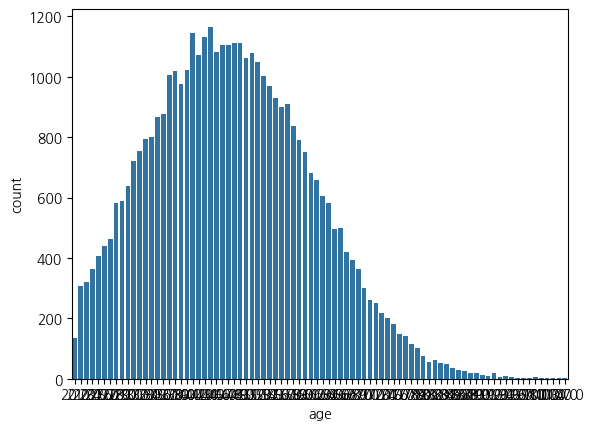

In [68]:
sns.countplot(data=df_rentalcars, x='age')
plt.show()

In [69]:
df_rentalcars_age_CMS = df_rentalcars[df_rentalcars['payment_type'] == 'CMS']


In [70]:
# 연령별 CMS 분포 확인
bins = [20,30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_rentalcars_age_CMS['age_group'] = pd.cut(df_rentalcars_age_CMS['age'], bins=bins, labels=labels)
df_rentalcars_age_CMS.head()

/tmp/ipykernel_90178/1711828994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rentalcars_age_CMS['age_group'] = pd.cut(df_rentalcars_age_CMS['age'], bins=bins, labels=labels)


,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage,age_group
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0,40-49
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0,50-59
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0,50-59
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0,50-59
5,66165241,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K3,90900,계약확정,0,없음,5.0,국민은행,정상,52.0,2001.0,50-59


1. 연령대별 연체 위험

2. 결제 유형별 연체 위험
    
3. 신용 등급과 연체 위험
    
4. 계약 금액과 연체 위험

/tmp/ipykernel_90178/3319782049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rentalcars, x='overdue', palette='Set2')


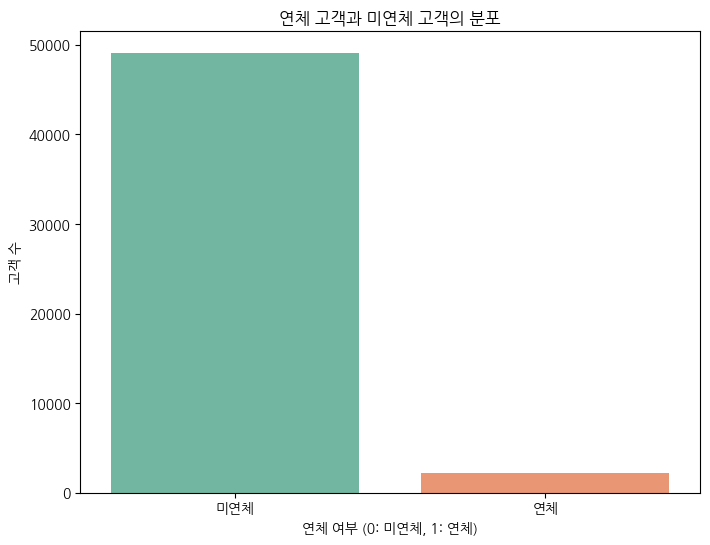

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_rentalcars, x='overdue', palette='Set2')
plt.title('연체 고객과 미연체 고객의 분포')
plt.xlabel('연체 여부 (0: 미연체, 1: 연체)')
plt.ylabel('고객 수')
plt.xticks([0, 1], ['미연체', '연체'])
plt.show()

In [72]:
# 연령대 그룹 생성
bins = [20, 30, 40, 50, 60, 100]  # 100세 이상을 포함하도록 수정
labels = ['20-29', '30-39', '40-49', '50-59', '60 이상']
df_rentalcars['age_group'] = pd.cut(df_rentalcars['age'], bins=bins, labels=labels, right=False)

# 생성된 age_group을 확인
print(df_rentalcars[['age', 'age_group']].head())



    age age_group
0  43.0     40-49
1  62.0     60 이상
2  60.0     60 이상
3  60.0     60 이상
4  51.0     50-59


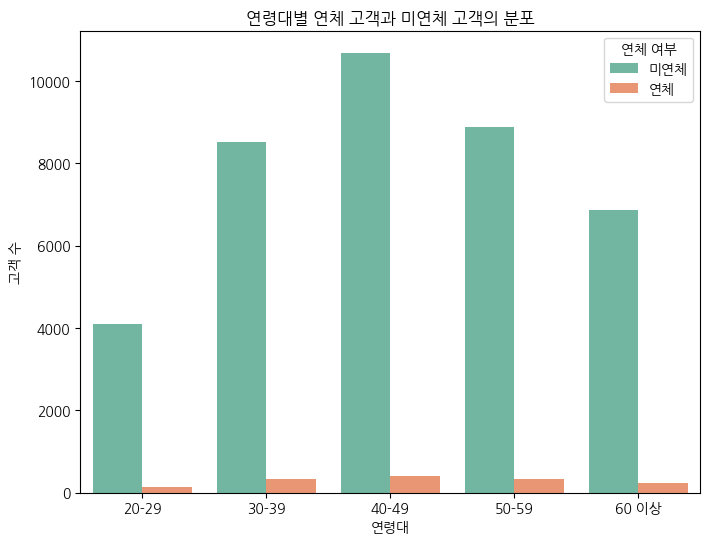

In [73]:
# 연령대별 연체 여부 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=df_rentalcars, x='age_group', hue='overdue', palette='Set2')
plt.title('연령대별 연체 고객과 미연체 고객의 분포')
plt.xlabel('연령대')
plt.ylabel('고객 수')
plt.legend(title='연체 여부', labels=['미연체', '연체'])
plt.show()


In [74]:
print(df_rentalcars.columns)



Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage',
       'age_group'],
      dtype='object')


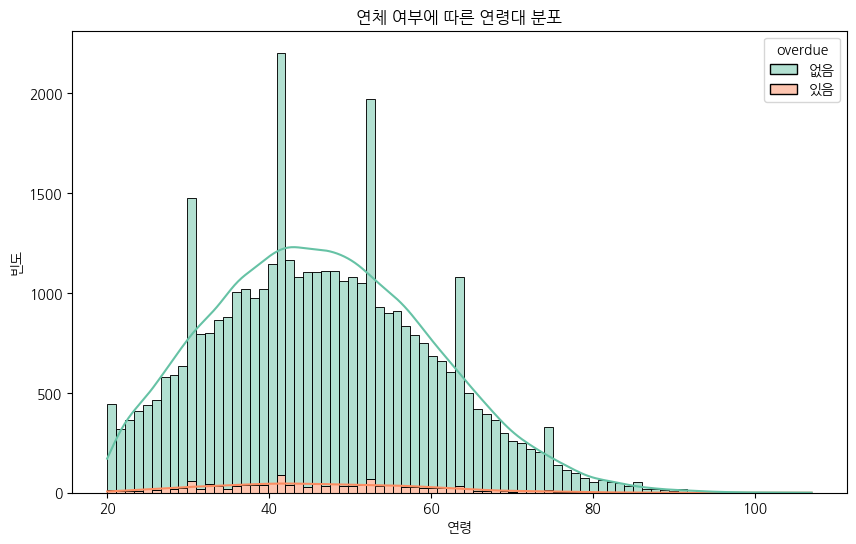

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_rentalcars, x='age', hue='overdue', multiple='stack', kde=True, palette='Set2')
plt.title('연체 여부에 따른 연령대 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()



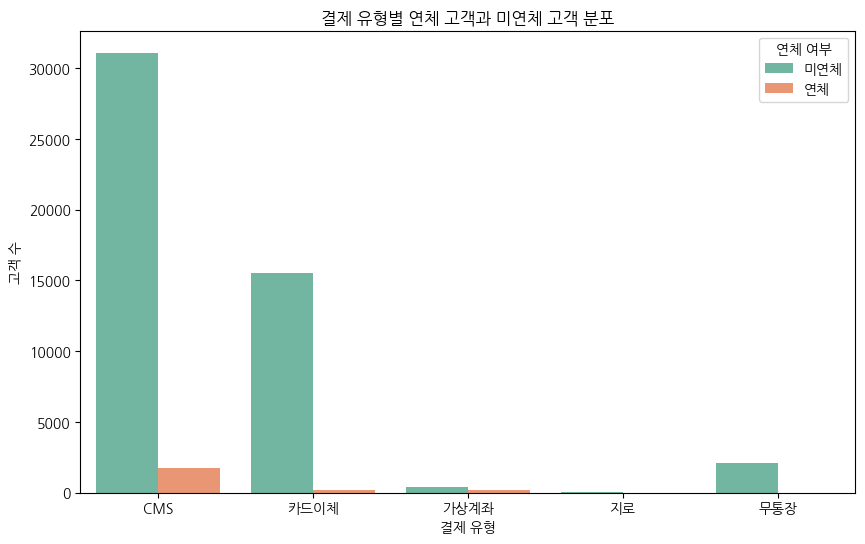

In [83]:
# 결제 유형별 연체고객과 미연체 고객 분포포
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rentalcars, x='payment_type', hue='overdue', palette='Set2')
plt.title('결제 유형별 연체 고객과 미연체 고객 분포')
plt.xlabel('결제 유형')
plt.ylabel('고객 수')
plt.legend(title='연체 여부', labels=['미연체', '연체'])
plt.show()

In [76]:
print(df_rentalcars.columns)


Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage',
       'age_group'],
      dtype='object')


/tmp/ipykernel_90178/3922538206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rentalcars, x='overdue', y='credit rating', palette='Set2')


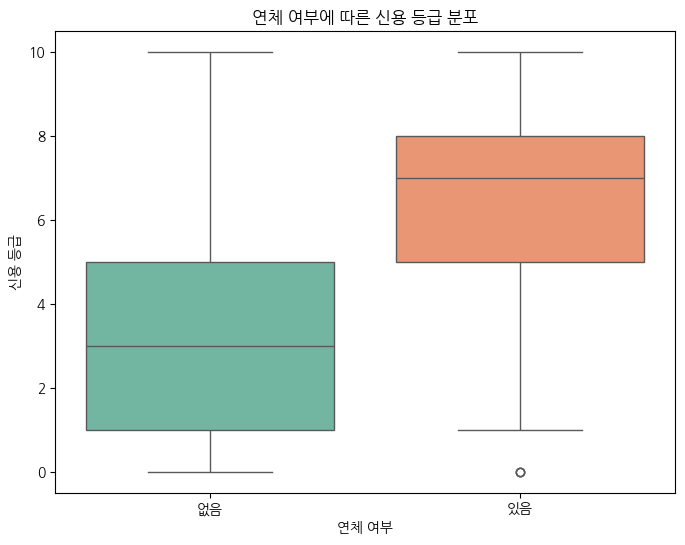

In [77]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_rentalcars, x='overdue', y='credit rating', palette='Set2')
plt.title('연체 여부에 따른 신용 등급 분포')
plt.xlabel('연체 여부')
plt.ylabel('신용 등급')
plt.show()



/tmp/ipykernel_90178/61893477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='overdue', y='amount', palette='Set2')


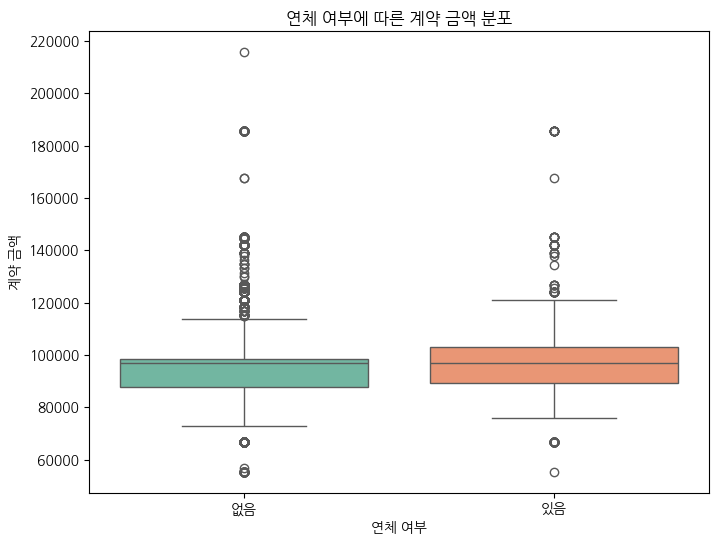

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='overdue', y='amount', palette='Set2')
plt.title('연체 여부에 따른 계약 금액 분포')
plt.xlabel('연체 여부')
plt.ylabel('계약 금액')
plt.show()


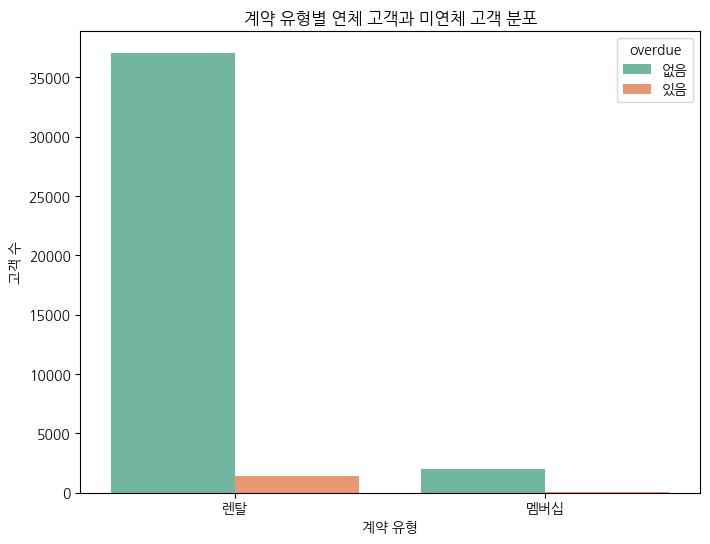

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type_of_contract', hue='overdue', palette='Set2')
plt.title('계약 유형별 연체 고객과 미연체 고객 분포')
plt.xlabel('계약 유형')
plt.ylabel('고객 수')
plt.show()


In [80]:
# 신용 등급과 금액을 숫자형으로 변환 (필요한 경우)
df_rentalcars['credit rating'] = pd.to_numeric(df['credit rating'], errors='coerce')
df_rentalcars['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# 변환된 데이터 확인
df_rentalcars[['credit rating', 'amount']].head()


,credit rating,amount
0,9.0,96900.0
1,2.0,102900.0
2,8.0,96900.0
3,5.0,66900.0
4,8.0,66900.0


In [84]:
# 연체 여부에 따른 평균 금액, 신용 등급 계산
#
df_rentalcars.groupby('overdue')[['amount', 'credit rating']].mean()


,amount,credit rating
overdue,,
없음,94832.077833,3.322909
있음,97219.493844,6.297538


/tmp/ipykernel_90178/3174504143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rentalcars, x='overdue', y='amount', palette='Set2')


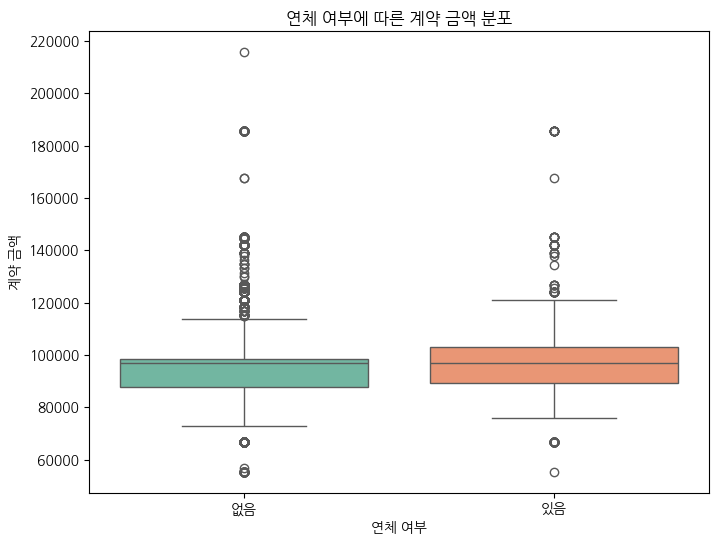

In [82]:
# 연체 여부에 따른 계약 금액 분포 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_rentalcars, x='overdue', y='amount', palette='Set2')
plt.title('연체 여부에 따른 계약 금액 분포')
plt.xlabel('연체 여부')
plt.ylabel('계약 금액')
plt.show()


In [ ]:
1. **연령대별 연체 위험**:
    - 연령대별로 연체 고객과 미연체 고객의 분포를 확인한 결과, 특정 연령대에서 연체 위험이 더 높게 나타났습니다.
    - 특히, 50-59세와 60세 이상의 연령대에서 연체 고객의 비율이 상대적으로 높았습니다.

2. **결제 유형별 연체 위험**:
    - 결제 유형에 따라 연체 위험이 다르게 나타났습니다.
    - CMS 결제 유형을 사용하는 고객들 중 연체 고객의 비율이 높았습니다.

3. **신용 등급과 연체 위험**:
    - 신용 등급이 낮을수록 연체 위험이 높아지는 경향이 있었습니다.
    - 연체 고객의 평균 신용 등급이 미연체 고객에 비해 낮았습니다.

4. **계약 금액과 연체 위험**:
    - 계약 금액이 높은 고객들 중 연체 고객의 비율이 높았습니다.
    - 연체 고객의 평균 계약 금액이 미연체 고객에 비해 높았습니다.

5. **기타 요인**:
    - 고객의 소득 수준, 직업, 지리적 위치 등도 연체 위험에 영향을 미칠 수 있습니다.
    -
